In [1]:
from PIL import Image   #导入PIL库中的Image模块

### 图像打开与保存

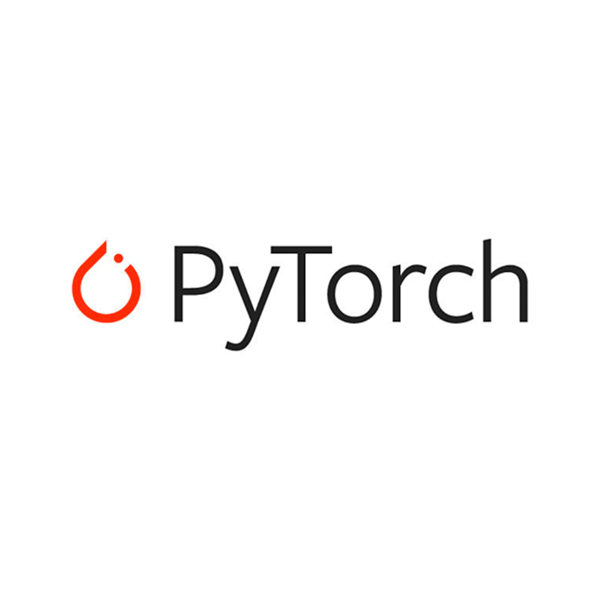

In [2]:
image = Image.open('pytorch.png')   #打开图像
image.save('pytorch_copy.png')   #保存图像
image  #展示图像

### 基本属性
#### 不同 mode 的像素表示不同：
- "L"：灰度，像素是整数 0..255。
- "RGB"：像素是 (R,G,B) 三元组，每项 0..255。
- "RGBA"：带 alpha 的四元组 (R,G,B,A)。
- "P"：调色板（先转换为 RGB 再操作通常更方便）。
- "F"：浮点单通道等（不常见）。

In [3]:
image.size #展示图像的尺寸 (width, height)

(600, 600)

In [4]:
image.mode   #展示图像的色彩模式 RGB

'RGBA'

In [5]:
image.format # 展示图像的格式 PNG

'PNG'

### 图像转换
convert() 可以切换模式（RGB、L=灰度、RGBA、CMYK）。

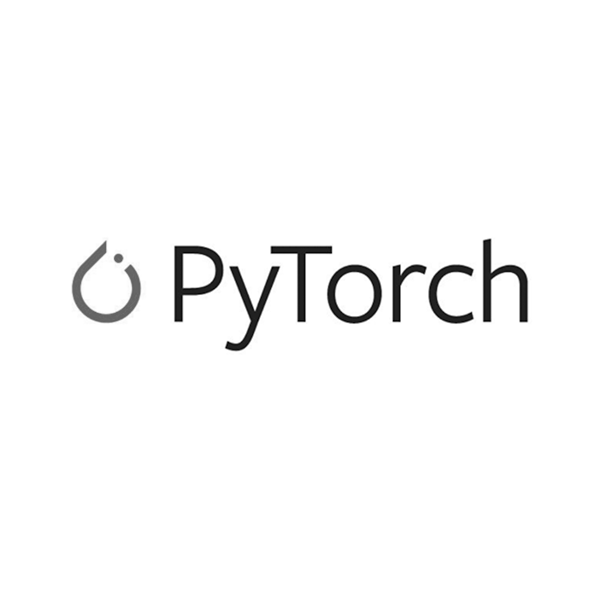

In [6]:
gray=image.convert('L')    #将图像转换为灰度图像
gray #展示灰度图像

In [7]:
gray.mode # 'L' 灰度图像

'L'

### 几何变换

#### 缩放

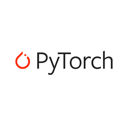

In [8]:
Resized =image.resize((128,128))  #调整图像大小
Resized  #展示调整大小后的图像

In [9]:
Resized.size  


(128, 128)

In [10]:
Resized.format # None,因为是新图像，没有格式

#### 裁剪 (左, 上, 右, 下)

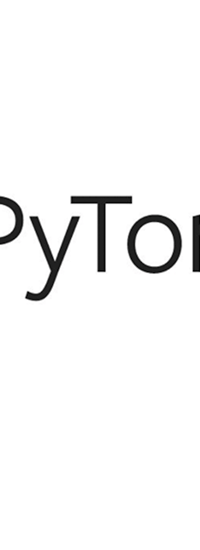

In [11]:
cropped = image.crop((200, 50, 400, 600))  #裁剪 (左, 上, 右, 下)
cropped  #展示裁剪后的图像

In [12]:
cropped.size

(200, 550)

#### 旋转（逆时针）

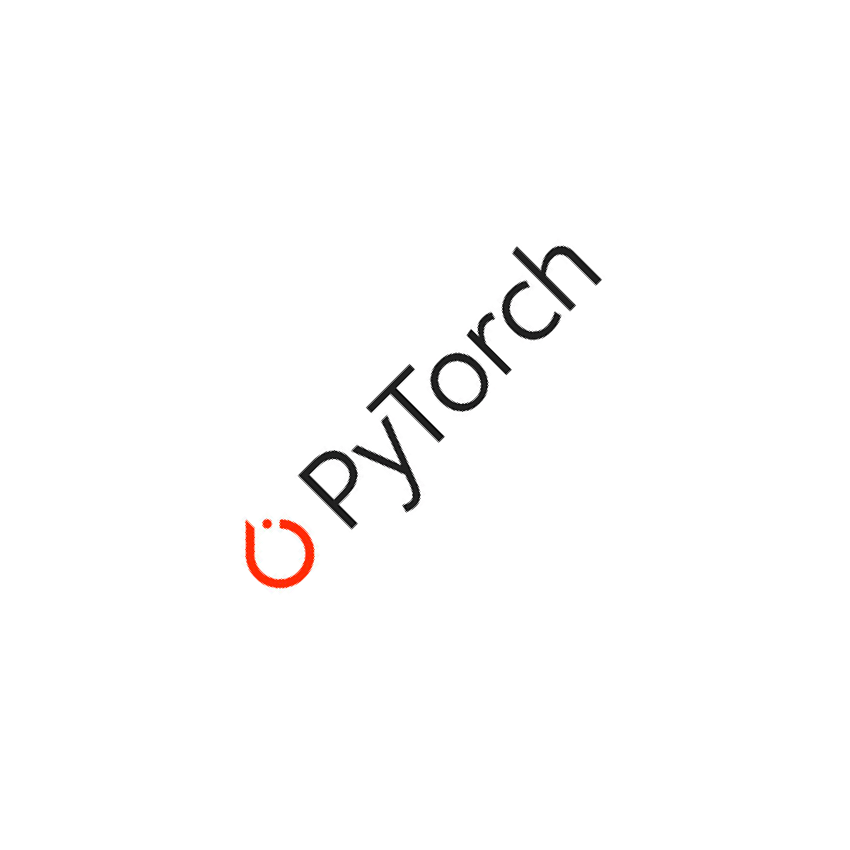

In [13]:
rotated = image.rotate(45, expand=True)
rotated  #旋转（逆时针）

### 翻转
要点：
- 返回新图像：transpose 不会原地修改原 Image，而是返回一个新的 Image 对象。
- 尺寸不变：只改变像素顺序，不改变 (width, height)。
- 保留模式 & alpha 通道：RGB、RGBA、L、P 等模式都会被保留，alpha 通道会随像素一起翻转。
- EXIF/元数据：Pillow 通常不会自动修改或更新 EXIF orientation 标签；如果图像含有 EXIF orientation，需要手动处理（否则图像看似翻转但元数据仍声明旧方向）。
- 性能：这是一次拷贝（不会返回视图），对大图像有内存/时间成本；NumPy/torch 的 flip 也会复制内存，但在某些场景下可更灵活。

常见常量（Image.transpose 支持）：
- Image.FLIP_LEFT_RIGHT — 水平翻转（镜像）
- Image.FLIP_TOP_BOTTOM — 垂直翻转（上下翻转）
- Image.ROTATE_90, Image.ROTATE_180, Image.ROTATE_270 — 旋转（注意：这些是常量，Pillow 有特定定义）
- Image.TRANSPOSE, Image.TRANSVERSE — 组合变换（少用）

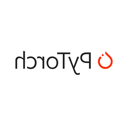

In [14]:
hflip = image.resize((128,128)).transpose(Image.FLIP_LEFT_RIGHT)  # 水平翻转
hflip  #展示水平翻转后的图像

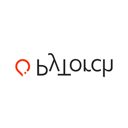

In [15]:
vflip = image.resize((128,128)).transpose(Image.FLIP_TOP_BOTTOM)  # 垂直翻转
vflip  #展示垂直翻转后的图像

### 仿射变化
```image.transform((300, 300), Image.AFFINE, (1, 0, 0, 0, 1, 0)) #仿射变换 ```
- image：一个 PIL.Image 对象
- .transform(size, method, data)：对图像做几何变换
- size=(300, 300) → 输出图像大小（宽=300，高=300）
- method=Image.AFFINE → 使用 仿射变换
- data=(1, 0, 0, 0, 1, 0) → 仿射矩阵参数
![](仿射变换.png)

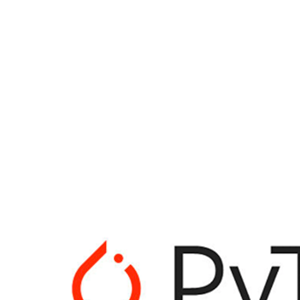

In [16]:
image.transform((300, 300), Image.AFFINE, (1, 0, 0, 0, 1, 0)) #仿射变换

(255, 255, 255, 255)


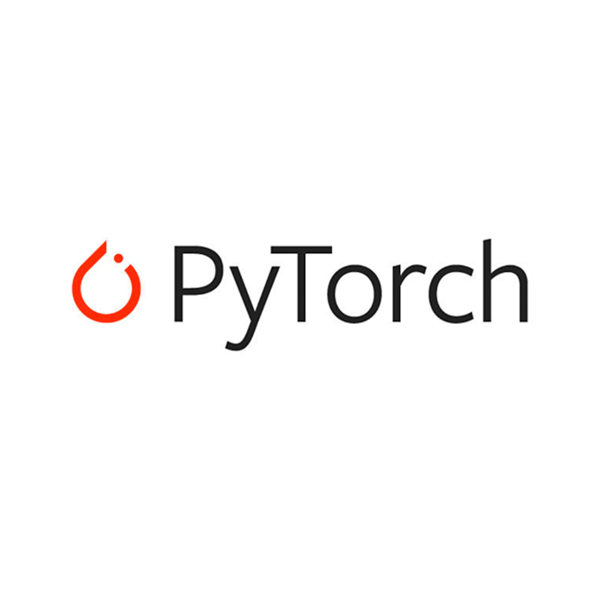

In [17]:
pixels = image.load()      # 像素访问
print(pixels[0, 0])      # 左上角像素值 (R, G, B)

# 转 numpy 数组
import numpy as np
arr = np.array(image)

# 从 numpy 数组转回 Image
img2 = Image.fromarray(arr)
img2


### NumPy 互操作

In [18]:
import numpy as np
img = Image.open("pytorch.png")
arr = np.array(img)   # => shape (H, W, C) for RGB ; dtype typically uint8
print("调整前：", arr)



调整前： [[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


调整后： [[[178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]
  ...
  [178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]]

 [[178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]
  ...
  [178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]]

 [[178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]
  ...
  [178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]]

 ...

 [[178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]
  ...
  [178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]]

 [[178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]
  ...
  [178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]]

 [[178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]
  ...
  [178 178 178 178]
  [178 178 178 178]
  [178 178 178 178]]]


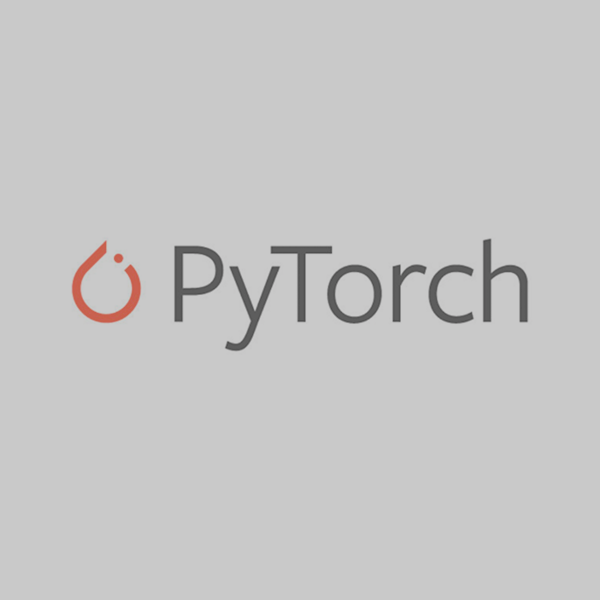

In [19]:
# 示例：整体调暗 30%（并裁剪到 0-255）
arr = np.clip(arr * 0.7, 0, 255).astype(np.uint8)
img2 = Image.fromarray(arr)
print("调整后：",arr)
img2  #展示调暗后的图像

In [20]:
from PIL import Image
import numpy as np

# 打开一张图片
img = Image.open("pytorch.png")

# 转 numpy
arr = np.array(img)

print(type(arr))   # <class 'numpy.ndarray'>
print(arr.shape)   # (H, W, 3) 如果是 RGB 图像
print(arr.dtype)   # uint8 (0~255)

# 访问像素
print(arr[0,0])       # 第1行第1列的像素，例如 [123  45  67]
print(arr[0,0,0])     # 红色分量
print(arr[0,0,1])     # 绿色分量
print(arr[0,0,2])     # 蓝色分量


<class 'numpy.ndarray'>
(600, 600, 4)
uint8
[255 255 255 255]
255
255
255


### 滤镜与增强

In [21]:
from PIL import ImageFilter, ImageEnhance
img = Image.open("pytorch.png")
blurred = img.filter(ImageFilter.BLUR)      # 模糊
sharpen = img.filter(ImageFilter.SHARPEN)   # 锐化

# 图像增强
enhancer = ImageEnhance.Contrast(img)
high_contrast = enhancer.enhance(10.0)       # 提升对比度

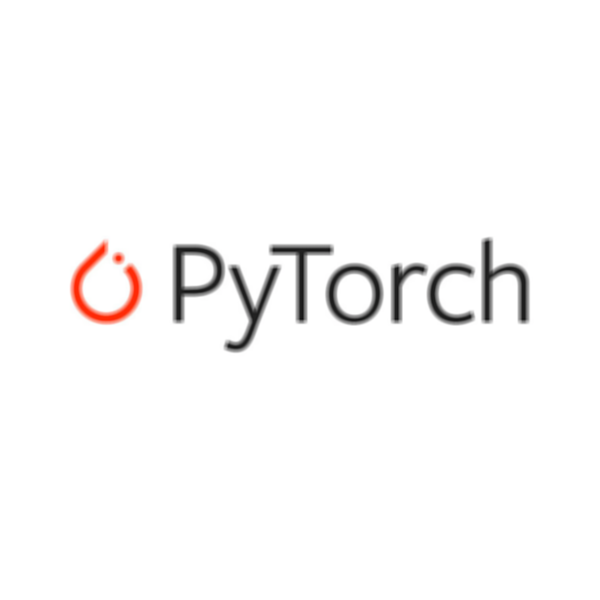

In [22]:
blurred  #展示模糊后的图像

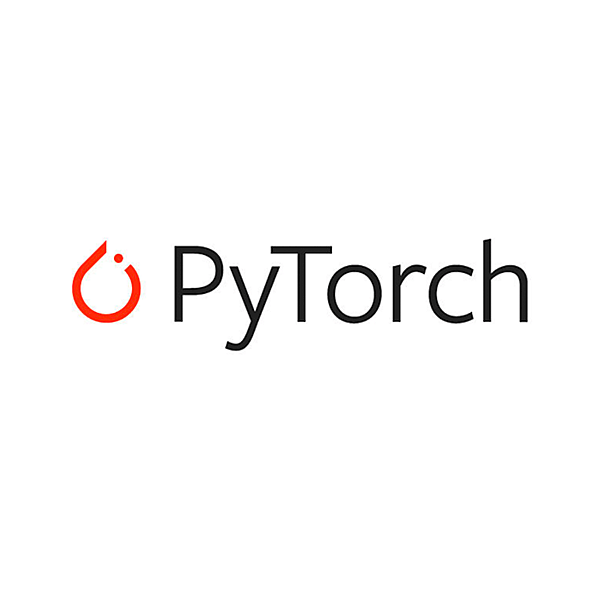

In [23]:
sharpen

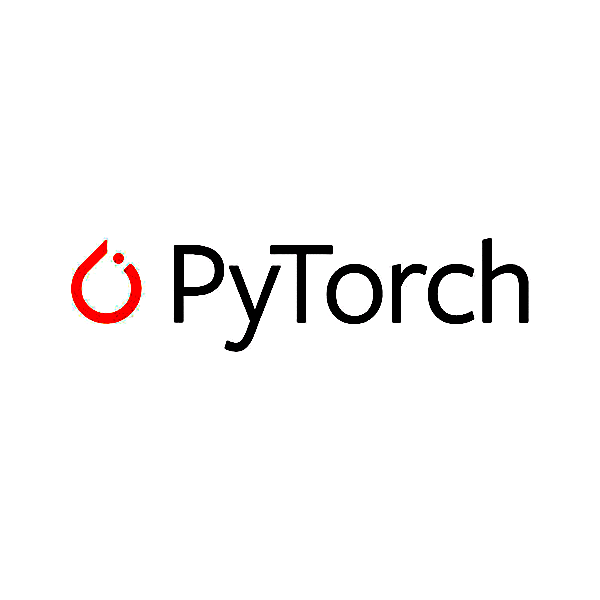

In [24]:
high_contrast